In [1]:
# Standard Python modules
import os, sys
import numpy as np
import pandas as pd
import xarray as xr
import yaml

# plot styles/formatting
import seaborn as sns
import cmocean.cm as cmo
import cmocean

# matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

# cartopy
import cartopy.crs as ccrs
from cartopy.mpl.geoaxes import GeoAxes
import cartopy.feature as cfeature

# extras
%matplotlib inline

# import personal modules
sys.path.append('../modules') # Path to modules
import ar_funcs

pd.options.display.float_format = "{:,.2f}".format # makes it so pandas tables display only first two decimals

In [2]:
path_to_data = '/data/projects/Comet/cwp140/'
path_to_out  = '../out/'       # output files (numerical results, intermediate datafiles) -- read & write
path_to_figs = '../figs/'      # figures

In [3]:
df = ar_funcs.clean_impact_data(start_date = '2000-01-01', end_date = '2019-08-31')

df

,Last Date,Location,Total Hours,Total IVT,Max IVT,Total Precip,Avg. Direction,Return Period,1h ARI,3h ARI,...,1d ARI,Impact Level,Impact dates,Impact,Impact Information,Location.1,Impact Source,Notes,Wick Precip,Wick Return
Impact dates,,,,,,,,,,,,,,,,,,,,,
2019-07-03,NaN,COOPHCSA2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.00,07/03/2019,Action stage,Chilkat at 7th highest crest,HCSA2,AHPS,NaN,NaN,NaN
2019-07-03,NaN,PAHN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.00,07/03/2019,Action stage,Chilkat at 7th highest crest,AHNA2,AHPS,NaN,NaN,NaN
2019-07-03,NaN,PAHN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN,...,1.00,0.00,07/03/2019,Action stage,Chilkat at 7th highest crest,PAHN,AHPS,NaN,NaN,NaN
2019-03-18,20190318_12Z,PAYA,24.00,"1,128.22",610.07,2.05,174.20,NaN,1.00,1.00,...,1.00,0.00,03/18/2019,Action flooding,Situk was at its 9th highest overflow,PAYA,AHPS,This is not in the AR database,NaN,NaN
2019-01-01,20190101,PAKW,NaN,NaN,NaN,NaN,NaN,NaN,1.00,1.00,...,1.00,2.00,01/01/2019,Landslide,Large landslide on POW blocked South Thorne Ba...,Thorne Bay/PAKW,"NEWS, MD",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2000-07-24,20000725_00Z,PAKT,36.00,"1,335.43",581.58,6.01,178.67,1,1.00,1.00,...,1.00,2.00,07/24/2000,Residential and street flooding',"Basements flooded along water street, small cr...",PAKT,APRFC,23rd had the 24th highest precip at 4.72,NaN,NaN
2000-07-24,20000725_00Z,KTNA2,36.00,"1,299.94",584.26,2.17,179.24,<1,NaN,NaN,...,NaN,2.00,07/24/2000,Residential and street flooding',"Basements flooded along water street, small cr...",KTNA2,APRFC,This event followed 2 ar events,NaN,NaN
2000-07-13,NaN,PAYA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.00,1.00,07/13/2000,"Flooding, action stage","Alsek at 10th highest overflow, minor flooding...",PAYA,NWS,This is not in AR database; 07/12/2000 - 07/13...,NaN,NaN


In [4]:
df.groupby('Impact Level').size()

Impact Level
0.00    102
1.00     47
2.00     71
3.00     23
4.00      4
5.00     14
dtype: int64

In [5]:
test = df.groupby([df.index.month, 'Impact Level']).size()
test

Impact dates  Impact Level
1             0.00             6
              1.00             1
              2.00            11
              4.00             2
2             0.00             3
3             0.00             1
              2.00             1
              3.00             1
5             0.00             2
              2.00             1
6             0.00            10
              1.00             5
              2.00             3
7             0.00            13
              1.00             3
              2.00             9
              3.00             4
8             0.00            15
              1.00            13
              2.00            17
              3.00             6
              5.00             1
9             0.00            34
              1.00            14
              2.00            18
              3.00             4
10            0.00             9
              1.00             7
              2.00             3
              3.

<AxesSubplot:xlabel='Impact dates'>

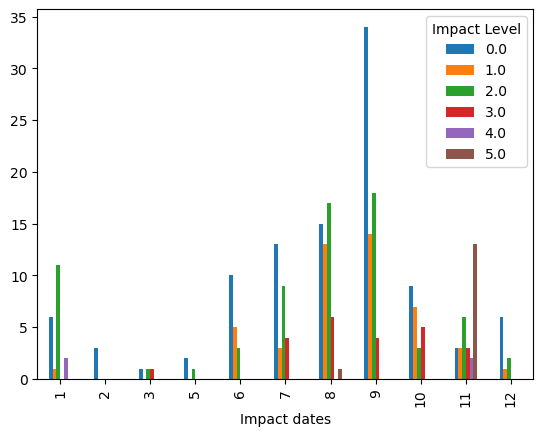

In [6]:
test.unstack('Impact Level').plot.bar()

In [9]:
keys = df['Location'].unique()
print(keys)
## loop through each row in impact dataframe
# for i, key in enumerate(keys):
    # subset_df = df.loc['Location' == key]
    
    ## grab the AR df for that station
    
## if 

['COOPHCSA2' 'PAHN' 'PAYA' 'PAKW' 'PAKT' 'KTNA2' 'PAJN' 'PAGS' 'PAGY'
 'HONA2' 'PASI' 'PAWG' 'PAPG']
